In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


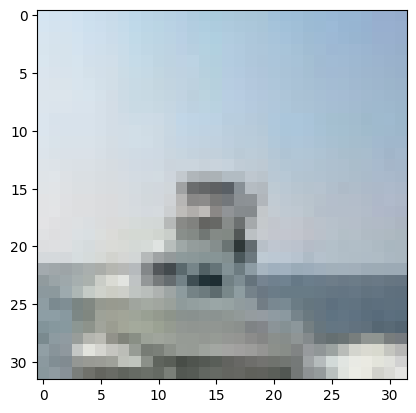

In [4]:
test = x_train[100]
plt.imshow(test)
plt.show()


In [5]:
#Pre-process
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
#Make sure input shape = 28*28*1
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], " - Train samples")
print(x_test.shape[0], " - Test samples")

x_train shape:  (50000, 32, 32, 3, 1)
50000  - Train samples
10000  - Test samples


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:

model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
      layers.Dropout(0.5),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dense(512, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [11]:
batch_size = 200
epochs = 30

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/30
225/225 [==============================] - 24s 106ms/step - loss: 1.8034 - accuracy: 0.3276 - val_loss: 1.3945 - val_accuracy: 0.5030
Epoch 2/30
225/225 [==============================] - 24s 107ms/step - loss: 1.4142 - accuracy: 0.4884 - val_loss: 1.2161 - val_accuracy: 0.5628
Epoch 3/30
225/225 [==============================] - 24s 106ms/step - loss: 1.2618 - accuracy: 0.5472 - val_loss: 1.1038 - val_accuracy: 0.6040
Epoch 4/30
225/225 [==============================] - 24s 108ms/step - loss: 1.1664 - accuracy: 0.5833 - val_loss: 0.9924 - val_accuracy: 0.6570
Epoch 5/30
225/225 [==============================] - 24s 106ms/step - loss: 1.1018 - accuracy: 0.6087 - val_loss: 0.9057 - val_accuracy: 0.6874
Epoch 6/30
225/225 [==============================] - 24s 108ms/step - loss: 1.0420 - accuracy: 0.6321 - val_loss: 0.8749 - val_accuracy: 0.7048
Epoch 7/30
225/225 [==============================] - 24s 108ms/step - loss: 0.9859 - accuracy: 0.6534 - val_loss: 0.8080 - val_ac

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.6205041408538818
Test accuracy:  0.7914999723434448
